# Support Vector Machine (SVM)
SVMs are powerful, versatile ML models, capable of performing linear or nonlinear classification, regression, and outlier detection. SVMs are useful for classification of complex but small/medium-sized datasets. 

## Margin Classification Visualization
The following pictures of the Iris dataset help explain the fundamental idea behind SVM: margins. 

The two classes are clearly linearly separable. The left plot shows decision boundaries of 3 possible linear classifiers: The green, dashed-line model is so bad it doesn't separate the classes properly. The other 2 models (red & purple lines) work perfectly on the training set, but their decision boundaries are so close to the data instances that these models will likely not generalize to new data well. 

The solid line in the right plot is the decision boundary of an SVM classifier. It separates the 2 classes while also staying as far away from the closest training instances as possible. Another way to think of the margin is that the SVM classifier is trying to fit the widest possible street (the parallel dashed lines) between the classes. This is *large margin classification*. 

In [3]:
# Imports for graphing
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [4]:
# Set up Iris dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
# SVM Classifier 
# Scikit-Learn's SVC is based on libsvm (from HW)
from sklearn.svm import SVC

# Initialize an SVC class with the linear kernel and "inf" for C
svm_clf = SVC(kernel="linear", C=1e20)

# Fit the data above
svm_clf.fit(X, y)

SVC(C=1e+20, kernel='linear')

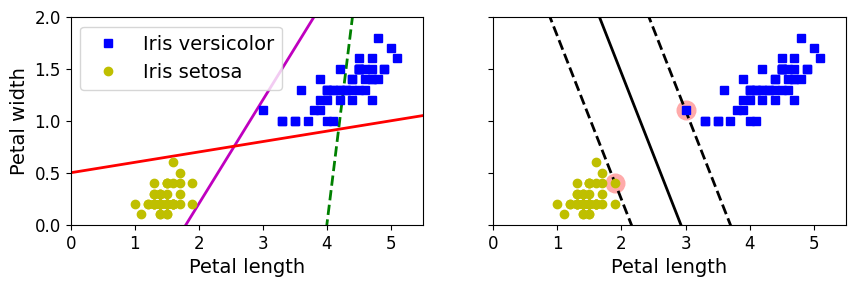

In [7]:
# Bad models
import numpy as np
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


In the right figure above notice that adding new training instances "off the street" won't affect the decision boundary. The SVM boundary is fully determined (or *supported*) by the instances located on the edges of the street. These supporting instances are called the *support vectors*. The 2 instances circled in light pink are the support vectors for this SVM example. 

## Hard Margin vs. Soft Margin Classification
**Hard Margin Classification:** If we strictly enforce that all instances must be "off the street" and on the correct sides, then this is hard margin classification. There are 2 main drawbacks with this approach: (1) it only works if the data is linearly separable and (2) it's very sensitive to outliers. 

**Soft Margin Classification:** To avoid those issues, we should use a more flexible model. The goal is to find a balance between keeping the street as large as possible and limiting *margin violations* (instances that could be in the middle of the street or on the wrong sides). 

**C Hyperparameter:** In Scikit-Learn's SVM classes, we control this balance with the **C** hyperparameter. Smaller C values give us a wider street (margin) with more margin violations. Higher C values lead to fewer margin violations but a smaller margin. 


## Linear SVM Classification
Steps: Load the Iris dataset, scale the features (because SVM is sensitive to the feature scales), and train a linear SVM model to detect Iris Virginica. 

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [9]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]     # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)     # Iris Virginica

In [10]:
# We'll use the Pipeline class to scale our features & initialize our SVM
# The general format for the Pipeline is:
#      Pipeline([
#          ("arg1_name", Arg1Constructor(...)), 
#          ("arg2_name", Arg2Constructor(...)),])


svm_clf = Pipeline([
    # First create a "scaler" with the default StandardScaler
 ("scaler", StandardScaler()),
    # Second create a "linear_svc" with the LinearSVC class
    #    where C = 1, the Hinge Loss function is used, and random state is 42
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

In [11]:
# Fit the data
svm_clf.fit(X, y)

C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [13]:
# Predict for the instance [5.5, 1.7]
# Unlike LR classifiers, SVMs don't output probabilities for each class (unless specified before calling fit)
svm_clf.predict(np.array([[5.5, 1.7]]))

array([1.])

### Generate Graphs Comparing Different Regularization Settings
We'll just compare small and large values of C for this. Once you've plotted the graphs, notice the margin width, which data instances are support vectors, and how many support vectors are used. 

In [15]:
scaler = StandardScaler()

# Create 2 SVMs (LinearSVC)
# svm_clf1 should use C = 1
# svm_clf2 should use C = 100
# Both SVMs should use Hinge Loss & random state 42
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

In [16]:
# Pipelines to scale the data for the 2 SVMs
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# Fit the data
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [17]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


(4.0, 5.9, 0.8, 2.8)

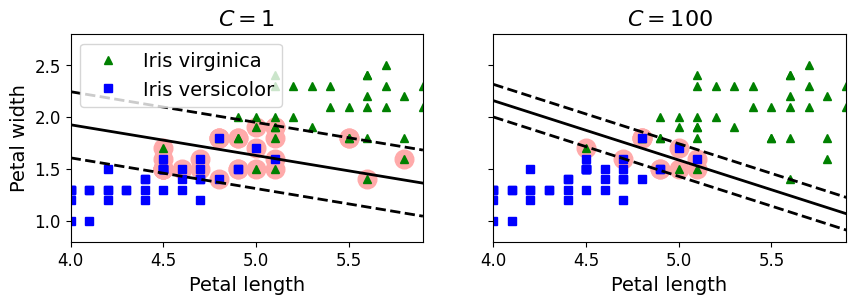

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


## Nonlinear SVM Classification
Linear SVM classifiers are efficient and work well in many cases, however, many datasets are not linearly separable. One way to handle nonlinear datasets is to add more features (e.g., polynomial features) which might result in a linearly separable dataset. 

To implement this, you can use a *Pipeline* with a *PolynomialFeatures* transformer, followed by a *StandardScaler*, and *LinearSVC*. 

In [23]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# Create a Pipeline
# First argument will be a PolynomialFeatures class of degree 3
# Second argument will be a default StandardScaler
# Third argument will be a LinearSVC with C = 10, Hinge Loss, and random state 42
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])



C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


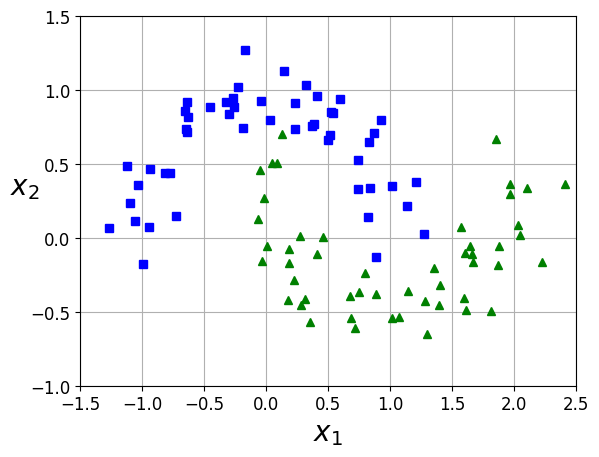

In [25]:
# Plot the dataset before classification
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Fit the data
polynomial_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

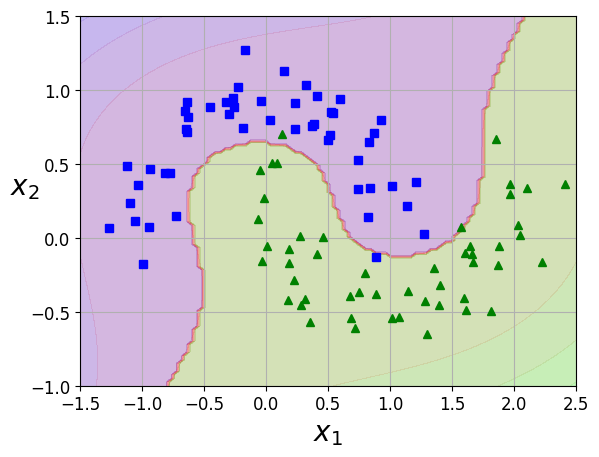

In [26]:
# Plot the dataset after classification with your polynomial_svm_clf
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Kernel Tricks
You can add polynomial features to most ML algorithms, not just SVMs.  A low polynomial degree can't deal with very complex datasets and a high degree creates too many features, which makes the model too slow.

For SVMs, we can apply the science-magic mathematical technique called the *kernel trick*. This will allow us to get the same results as if we had added many polynomial features (even very high degree polynomials), without having to actually add them. 

In [29]:
# Create a Pipeline
# First class argument is a default StandardScaler
# Second class argument is an SVC with the following parameters:
#     "poly" kernel with degree 3, coef0 = 1, and C = 5
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

# Fit the data
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [31]:
# Create a similar Pipeline
# Just change the SVC to use a 10th-degree polynomial & coef0 = 100
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

# Fit the data
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

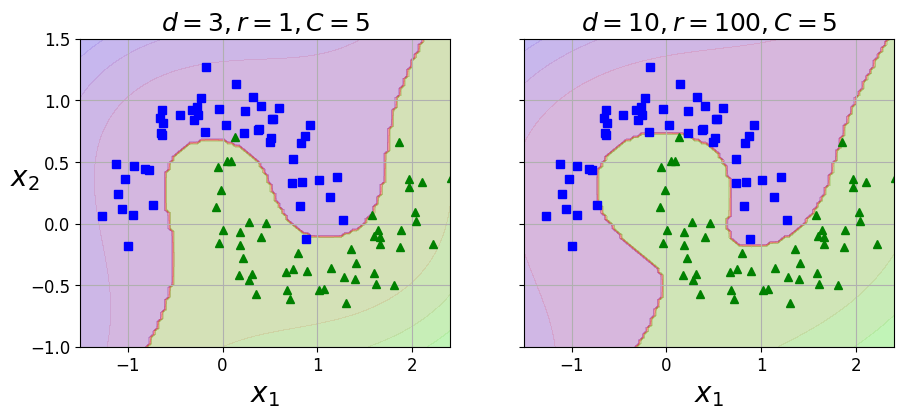

In [32]:
# Visualize the difference between kernels with different polynomial degrees
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

### Gaussian Radial Basis Function (RBF) Kernel
Another technique for nonlinear problems is to add features computed using a *similarity function* that measures how much each instance resembles a particular *landmark*. Similar to the polynomial features method, the similarity features method can be useful with any ML algorithm. However, it can become computationally expensive to compute extra features, especially on a large training dataset. 

We can use the SVM kernel to get a similar result as though we had added many similarity features, but without actually having to add them. 

Scikit-Learn's SVC class has the "rbf" kernel. The two main hyperparameters are *C* and $\gamma$ which makes the bell-shape curve (of the Gaussian/normal distribution) narrower. This causes each instance's range of influence to become smaller and the decision boundary ends up more irregular. A small $\gamma$ value makes the bell-shaped curve wider, so instances have a larger range of influence, which causes the decision boundary to be smoother. Essentially, $\gamma$ acts like a regularization parameter: if you're overfitting, reduce $\gamma$; if you're underfitting, increase $\gamma$. 

In [33]:
# Create a Pipeline
# First class argument should be a default StandardScaler
# Second argument should be an SVC with the RBF kernel and
#      with hyperparameters: gamma = 5 and C = 0.001

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

# Fit the data
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## SVM Regression
SVM works for both linear and nonlinear classification and regression. For SVM regression, you reverse the objective: instead of trying to fit the largest possible margin between 2 classes while limiting margin violations, SVM regression tries to fit as many instances as possible *on* the margin while limiting margin violations. 

Scikit-Learn's *SVR* class supports the kernel trick. *LinearSVR* is the regression equivalent of the *LinearSVC* class. The hyperparameter $\epsilon$ controls the width of the margin.  

In [34]:
# Perform linear SVM regression
from sklearn.svm import LinearSVR

# Create a LinearSVR with an epsilon of 1.5
svm_reg = LinearSVR(epsilon=1.5)

# Fit the data X, y
svm_reg.fit(X, y)

C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [35]:
# Perform nonlinear SVM regression
from sklearn.svm import SVR

# Create an SVR with a 2nd-degree polynomial kernel &
#     C = 100 & epsilon = 0.1
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

# Fit the data X, y
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
# 